# SVM (Support Vector Machine)
IN this project, we will explore the Support Vector Machine (SVM) algorithm with the Breast Cancer Dataset. The objective of this dataset is to predict whether a breast tumor is malignant or benign based on the features of the biopsy image. Support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories.
## Problem Statement:
Breast cancer is one of the most common forms of cancer affecting women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and improved patient outcomes. Machine learning techniques, such as Support Vector Machines (SVM), have shown promise in classifying breast cancer cases as either malignant or benign based on features extracted from medical images and other diagnostic tests.
## Objective:
Develop a predictive model using SVM to classify breast tumors as malignant or benign based on a set of features extracted from diagnostic tests.
## Dataset
Breast cancer wisconsin (diagnostic) dataset

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [101]:
#loading the dataset from the sklearn datasets
dataset=load_breast_cancer()

In [102]:
#The full description of the dataset.
print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [103]:
#the keys of the datasets
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
df=pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
df["diagnosis"]=dataset["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.diagnosis.value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

From the discription of dataset, 1 is classified as Benign and 0 as Malignant

In [8]:
#Spliting to trainset and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dataset["data"],dataset["target"],test_size=0.3,random_state=3)

In [9]:
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


## Data Plot in 2D

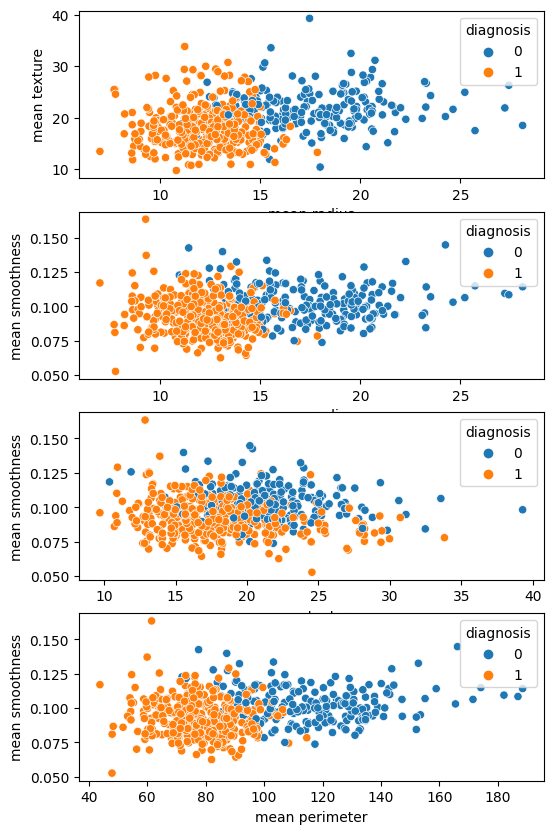

In [74]:
fig,axes=plt.subplots(4,1,figsize=(6,10))
sb.scatterplot(ax=axes[0],x="mean radius",y="mean texture",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[1],x="mean radius",y="mean smoothness",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[2],x="mean texture",y="mean smoothness",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[3],x="mean perimeter",y="mean smoothness",data=df,hue="diagnosis")
plt.show()

# Plots In 3d

Text(0.5, 0.5, 'Mean Smoothness')

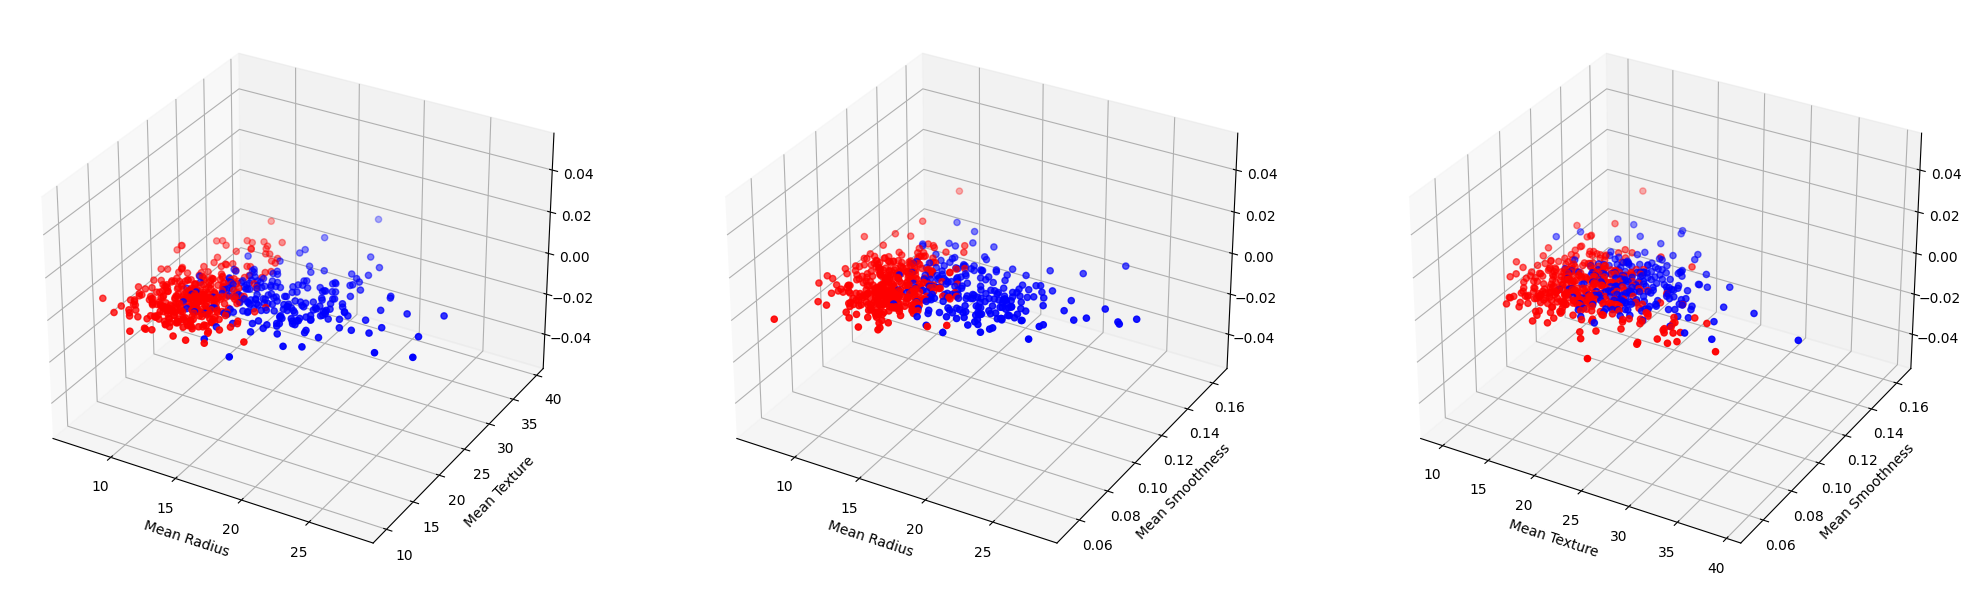

In [11]:
from mpl_toolkits.mplot3d import Axes3D
huemap={1:'r',0:'b'}# color redis B and color Blue is M
fig, ax = plt.subplots(1,3,figsize=(25,25),subplot_kw=dict(projection='3d'))
ax[0].scatter3D(df['mean radius'].values,df["mean texture"],c=df["diagnosis"].map(huemap))
ax[0].set_xlabel("Mean Radius")
ax[0].set_ylabel("Mean Texture")
ax[1].scatter3D(df['mean radius'].values,df["mean smoothness"],c=df["diagnosis"].map(huemap))
ax[1].set_xlabel("Mean Radius")
ax[1].set_ylabel("Mean Smoothness")
ax[2].scatter3D(df["mean texture"].values,df["mean smoothness"],c=df["diagnosis"].map(huemap))
ax[2].set_xlabel("Mean Texture")
ax[2].set_ylabel("Mean Smoothness")

In [100]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training SVM Model 
Here, the SVM model 'model' is trained with X_train, Y_train datasets with a linear kernel and regularization parameter c=1

In [13]:
from sklearn.svm import SVC

# Train the SVM model
model = SVC(kernel='linear', C=1)
model.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the performance of the model
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print('Accuracy:', accuracy)
print('Classification Report:\n', report)

Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.98      0.99      0.99       109

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Prediction from the SVM model

In [15]:
import numpy as np

new_sample = np.array([17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189])
new_sample = new_sample.reshape(1, -1)  # reshape the array to match the input shape of the model
prediction = model.predict(new_sample)

print("Prediction:", prediction) 

Prediction: [0]


## Visualization of the SVM hyperplane

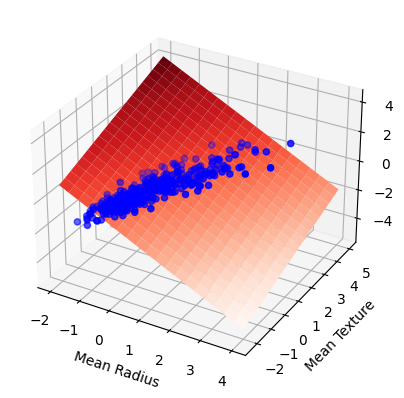

In [84]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],X_train[:,2], c='b')
#ax[0].scatter3D(df['mean radius'].values,df["mean texture"],c=df["diagnosis"].map(huemap))
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
zz = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy) / model.coef_[0][2]
tmpx = np.linspace(-2, 4, 20)
tmpy = np.linspace(-2, 5, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')

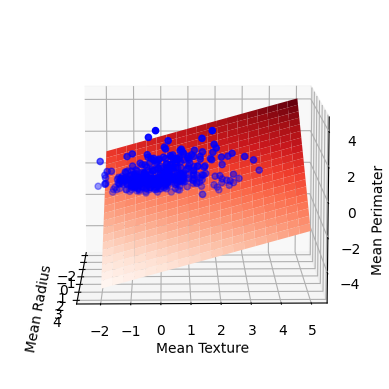

In [99]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],X_train[:,2], c='b')
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimater")
zz = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy) / model.coef_[0][2]
tmpx = np.linspace(-2, 4, 20)
tmpy = np.linspace(-2, 5, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
for ii in range(0,360,1):
    ax.view_init(elev=10., azim=ii)

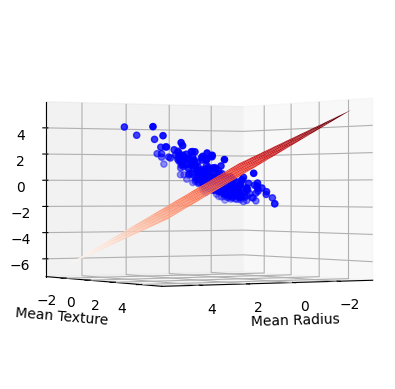

In [98]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],X_train[:,2], c='b')
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
zz = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy) / model.coef_[0][2]
tmpx = np.linspace(-3, 5, 10)
tmpy = np.linspace(-3, 5, 10)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
for ii in range(0,60,1):
    ax.view_init(elev=0, azim=ii)

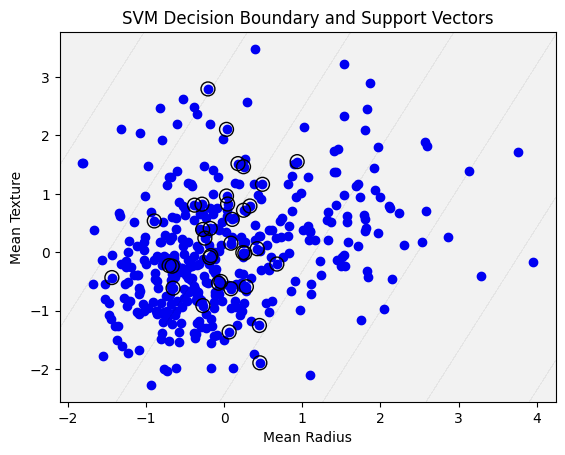

In [125]:
plt.scatter(X_train[:, 0], X_train[:, 1], c='b')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
zz = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy)
plt.contourf(xx, yy, zz(xx,yy), colors=['k', 'k', 'k'], alpha=0.05)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('SVM Decision Boundary and Support Vectors')
plt.show()